In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_excel('/content/default of credit card clients.xls',header=1,index_col=0)

In [3]:
df.rename(columns={"PAY_0":"PAY_1"},inplace=True)

In [4]:
df.sample(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
29424,310000,1,1,2,30,-1,0,0,0,0,...,65010,67144,60592,207000,20000,60126,20000,25000,6000,0
18537,80000,2,2,2,26,2,2,2,0,0,...,78641,48837,50592,8000,0,3300,2000,3800,0,0
22348,180000,2,1,2,28,-1,-1,-1,-1,-1,...,600,6800,12627,5488,5960,600,6800,12627,0,0
6442,70000,2,2,2,24,0,0,0,0,0,...,64457,66021,67267,3167,2521,2400,2600,2614,2376,0
27606,150000,2,2,1,26,0,0,0,0,2,...,77659,15525,0,2481,4263,8900,0,0,0,0
8458,400000,1,2,1,39,0,0,0,0,0,...,169138,144434,124802,15395,10232,12115,6285,11106,3124,0
2883,210000,2,1,2,31,-1,-1,-1,0,0,...,57751,25456,10625,10000,19875,50000,15456,10625,213,0
1998,40000,2,3,1,59,0,0,0,0,0,...,14548,16274,15650,1573,1512,504,2770,613,14,0
26294,80000,2,2,2,34,1,-2,-1,-1,-1,...,1347,2495,1248,0,1269,1351,2498,3,0,0


In [5]:
df['EDUCATION'].value_counts()

,count
EDUCATION,
2,14030
1,10585
3,4917
5,280
4,123
6,51
0,14


In [6]:
#sex:male-1,female-2  ; education:0-Uneducate,1-High School,2-Under Graduate,3-Post Graduate,4-PhD,5-Vocational,6-Others
#marriage:0-Other,1-Married, 2-UNmarried ,3-Divorce ; Pay_1-Pay_6:-1=paid in full, 0=paid in time, -2=no consumption(no bill), 1-9=month delay
#Bill_amt1-Bill_amt6 : bill amount ;Pay_amt1-Pay_amt6: paid amount
#default payment:1-default,0-no default

In [7]:
df.shape

(30000, 24)

In [8]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [9]:
y=['default payment next month']
X=[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

In [10]:
#have null values or not?
df.isnull().sum()

,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_1,0
PAY_2,0
PAY_3,0
PAY_4,0
PAY_5,0


In [11]:
#have duplicate values or not?-no
df.duplicated()

,0
ID,
1,False
2,False
3,False
4,False
5,False
...,...
29996,False
29997,False
29998,False


In [12]:
#mathematical look
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [13]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_1                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_AMT4  

In [14]:
df.dtypes

,0
LIMIT_BAL,int64
SEX,int64
EDUCATION,int64
MARRIAGE,int64
AGE,int64
PAY_1,int64
PAY_2,int64
PAY_3,int64
PAY_4,int64
PAY_5,int64


In [15]:
#correlation between columns
df.corr()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
LIMIT_BAL,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,...,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_1,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614
PAY_5,-0.249411,-0.055064,0.097520,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,...,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149


In [16]:
#correlation jitna positive hoga utna  related hoga jitna negative hoga utna less related hoga
#mostly default payement is strongly related to pay_1-pay_6 and slightly with education ,age.
#this means if the person has more age ,education and less delay then he is not default.

# **Data Visualization**

In [17]:
import seaborn as sns

In [18]:
#there are maximum people who pay the money and less people who will not pay
#our data is imbalance
#Female is more than male who pay there bill
#most of the people are undergraduate
#most of the people are unmarried
#maximum age is 30
#in first month maximum people pay their money

<Axes: xlabel='SEX', ylabel='count'>

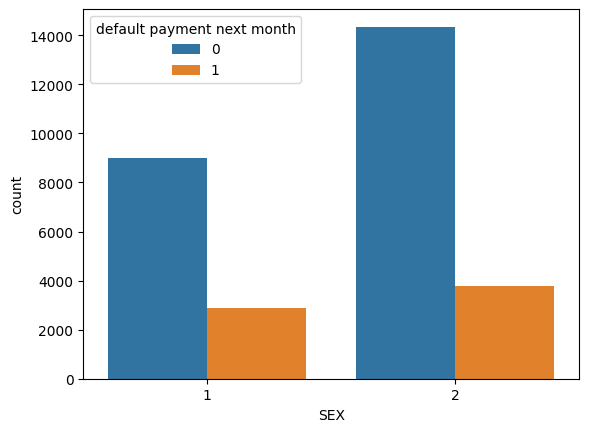

In [19]:

sns.countplot(x=df['SEX'],hue=df['default payment next month'],data=df)

In [20]:
#there is more female than man who pay there bill

<Axes: xlabel='MARRIAGE', ylabel='count'>

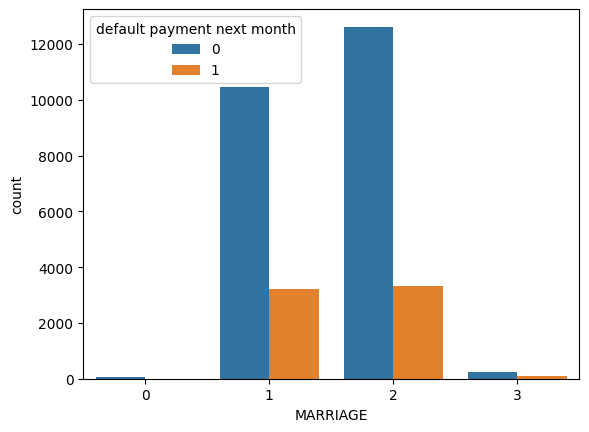

In [21]:
sns.countplot(x=df['MARRIAGE'],hue=df['default payment next month'],data=df)

<Axes: xlabel='AGE', ylabel='count'>

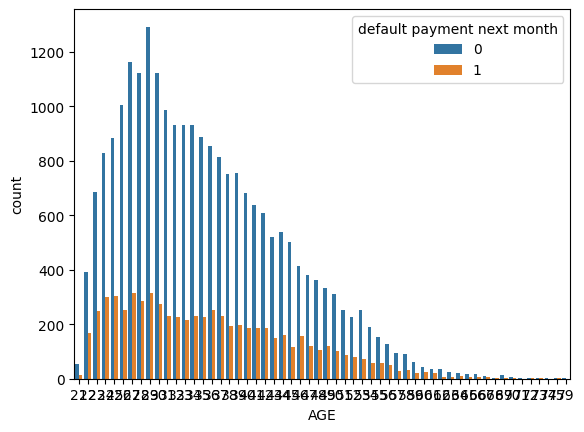

In [22]:
sns.countplot(x=df['AGE'],hue=df['default payment next month'],data=df)

<Axes: xlabel='AGE', ylabel='count'>

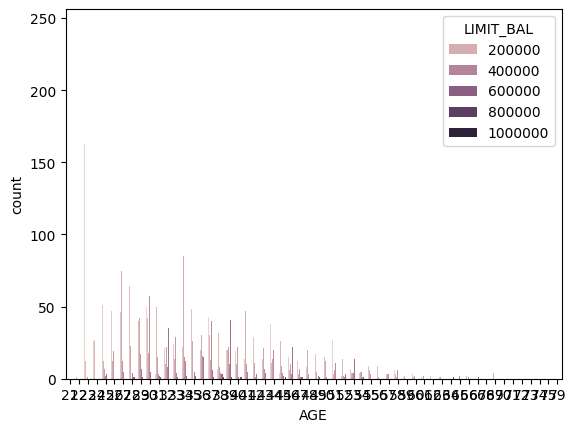

In [23]:
sns.countplot(x=df['AGE'],hue=df['LIMIT_BAL'],data=df)

In [24]:
#konse age ke kitne log default hai
#male jada pay kiya ya female ne?
#educated logo ne kiya ya ?
#pay_1 t0 pay_6 ?

In [25]:
#male default count
male_default_count = df[(df['SEX'] == 1) & (df['default payment next month'] == 1)].shape[0]
print("Number of males who defaulted:", male_default_count)

Number of males who defaulted: 2873


In [26]:
#male undefault count
male_undefault_count = df[(df['SEX'] == 1) & (df['default payment next month'] == 0)].shape[0] #how many male are not defaulted yee shape btata hai
print("Number of males who are not defaulted:", male_undefault_count)

Number of males who are not defaulted: 9015


In [27]:
#more male has not paid their bill

In [28]:
#female default count
female_default_count=df[(df['SEX']==2) & (df['default payment next month']==1)].shape[0]
print("Number of females who defaulted ",female_default_count)

Number of females who defaulted  3763


In [29]:
#female undefaulted count
female_undefault_count=df[(df['SEX']==2) & (df['default payment next month']==0)].shape[0]
print("Number of females who are not defaulted",female_undefault_count)

Number of females who are not defaulted 14349


In [30]:
#jada trr konse age ne jada pay ni kiya  hai
age_default_count=df[df['default payment next month'] == 1].groupby('AGE').size()

In [31]:
print("Number of defaults for each group",age_default_count)

Number of defaults for each group AGE
21     14
22    169
23    247
24    300
25    302
26    253
27    313
28    286
29    313
30    274
31    229
32    225
33    215
34    231
35    226
36    254
37    229
38    194
39    199
40    187
41    185
42    185
43    150
44    162
45    116
46    157
47    120
48    104
49    119
50    101
51     88
52     78
53     74
54     56
55     57
56     49
57     27
58     31
59     21
60     23
61     21
62      7
63      8
64      9
65      5
66      7
67      5
68      1
69      3
70      2
72      1
73      3
75      1
dtype: int64


In [32]:
#jada trr konsa age ne pay kiya hai
age_undefault_count=df[df['default payment next month'] == 0].groupby('AGE').size()
print("Number of undefaults for each group",age_undefault_count)

Number of undefaults for each group AGE
21      53
22     391
23     684
24     827
25     884
26    1003
27    1164
28    1123
29    1292
30    1121
31     988
32     933
33     931
34     931
35     887
36     854
37     812
38     750
39     755
40     683
41     639
42     609
43     520
44     538
45     501
46     413
47     381
48     362
49     333
50     310
51     252
52     226
53     251
54     191
55     152
56     129
57      95
58      91
59      62
60      44
61      35
62      37
63      23
64      22
65      19
66      18
67      11
68       4
69      12
70       8
71       3
72       2
73       1
74       1
75       2
79       1
dtype: int64


In [33]:
#educated unpaid bill
educate_default_count=df[df['default payment next month']==1].groupby('EDUCATION').size()
print(educate_default_count)

EDUCATION
1    2036
2    3330
3    1237
4       7
5      18
6       8
dtype: int64


In [34]:
#educate paid bill
educate_undefault_count=df[df['default payment next month']==0].groupby('EDUCATION').size()
print(educate_undefault_count)

EDUCATION
0       14
1     8549
2    10700
3     3680
4      116
5      262
6       43
dtype: int64


In [35]:
#mostly undergraduate people paid bill

In [36]:
#marriage
marriage_default_count=df[df['default payment next month']==1].groupby('MARRIAGE').size()
marriage_default_count

,0
MARRIAGE,
0,5
1,3206
2,3341
3,84


In [37]:
#means unmarried logo ne pay nhi kiya hai

In [38]:
marriage_undefault_count=df[df['default payment next month']==0].groupby('MARRIAGE').size()
marriage_undefault_count

,0
MARRIAGE,
0,49
1,10453
2,12623
3,239


In [39]:
#pay_1
#how many people gave pay_1
pay_1_undefault_count=df[df['default payment next month']==0].groupby('PAY_1').size()
pay_1_undefault_count

,0
PAY_1,
-2,2394
-1,4732
0,12849
1,2436
2,823
3,78
4,24
5,13
6,5


In [40]:
#default
pay_1_default_count=df[df['default payment next month']==1].groupby('PAY_1').size()
pay_1_default_count

,0
PAY_1,
-2,365
-1,954
0,1888
1,1252
2,1844
3,244
4,52
5,13
6,6


In [41]:
balance_undefault_count=df[df['default payment next month']==0].groupby('LIMIT_BAL').size()
balance_undefault_count

,0
LIMIT_BAL,
10000,296
16000,2
20000,1278
30000,1042
40000,138
...,...
750000,4
760000,1
780000,2


<Axes: >

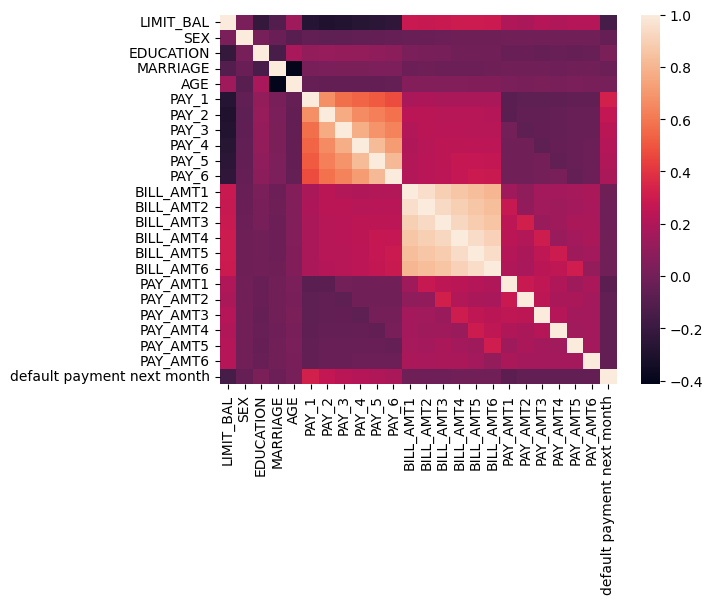

In [42]:
sns.heatmap(df.corr(),fmt=".2f")

In [43]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# **Feature Engineering**

**1.Average Payement Delay**

In [44]:
df['avg_pay_delay']=df[['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].mean(axis=1)

In [45]:
df['avg_pay_delay']

,avg_pay_delay
ID,
1,-0.333333
2,0.500000
3,0.000000
4,0.000000
5,-0.333333
...,...
29996,0.000000
29997,-0.666667
29998,1.333333


**2.Credit Utilization Ratios**

In [46]:
#means how much of their credit limit are they using?
for i in range(1,7):
  df[f'limit_util_ratio']=df[f'BILL_AMT{i}']/df[f'LIMIT_BAL']

In [47]:
# df[f'utilization_{1}']
df[f'limit_util_ratio']

,limit_util_ratio
ID,
1,0.000000
2,0.027175
3,0.172767
4,0.590940
5,0.382620
...,...
29996,0.072636
29997,0.000000
29998,0.645233


**3.How much how do they pay and owe?**

In [48]:
df['total_bill_amt'] = df[[f'BILL_AMT{i}' for i in range(1, 7)]].sum(axis=1)
df['total_pay_amt'] = df[[f'PAY_AMT{i}' for i in range(1, 7)]].sum(axis=1)
# df['payment_gap'] = df['total_bill_amt'] - df['total_pay_amt']

**4.Payment Ratios**

In [49]:
df['pay_vs_bill_ratio'] = df['total_pay_amt'] / (df['total_bill_amt'] + 1)  # Avoid division by zero

**5.Repayment Behaviour**

In [50]:
#are they always late?
pay_cols = [f'PAY_{i}' for i in [1, 2, 3, 4, 5, 6]]

df['months_late'] = df[pay_cols].apply(lambda row: (row > 0).sum(), axis=1)
# df['max_delay'] = df[pay_cols].max(axis=1)
# df['avg_delay'] = df[pay_cols].mean(axis=1)

6.**Risk Indicator**

In [51]:
df['no_payment_flag'] = (df['total_pay_amt'] == 0).astype(int)  # astype used to convert True to 1 ,if 1 then no payement if 0 then some payement
# df['always_late_flag'] = df[pay_cols].apply(lambda x: all(i > 0 for i in x)if not x.empty else False, axis=1).astype(int)


In [52]:
# df['no_payment_flag']

In [53]:
# df['always_late_flag']

# **Train_Test_Split**

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# features=['LIMIT_BAL','EDUCATION','MARRIAGE','avg_pay_delay','limit_util_ratio','total_bill_amt','total_pay_amt',
#           'pay_vs_bill_ratio','months_late','no_payment_flag']

# X=df[features]
# y=df['default payment next month']

X_train,X_test,y_train,y_test=train_test_split(df.drop(columns=(['default payment next month'])),df['default payment next month'],test_size=0.3,random_state=42)

In [55]:
X_train.shape, X_test.shape

((21000, 30), (9000, 30))

In [56]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,roc_auc_score,accuracy_score,confusion_matrix

In [58]:
dmodel=DecisionTreeClassifier(class_weight='balanced',random_state=42)
lmodel=LogisticRegression(class_weight='balanced',max_iter=1000)
rmodel=RandomForestClassifier(class_weight='balanced',max_depth=10, random_state=42)


In [59]:
# dmodel.fit(X_train_scaled,y_train)
# lmodel.fit(X_train_scaled,y_train)
rmodel.fit(X_train_scaled,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=42)

In [60]:
# y_pred=dmodel.predict(X_test_scaled)
# y_pred2=lmodel.predict(X_test_scaled)
y_prob = rmodel.predict_proba(X_test_scaled)[:, 1]
y_pred3=rmodel.predict(X_test_scaled)

In [61]:
print(f"Random Forest Classifer")
print(f"{classification_report(y_test,y_pred3)}")
print(f"Confusion Matrix:{confusion_matrix(y_test,y_pred3)}")
print(f"Accuracy Score:{accuracy_score(y_test,y_pred3)}")
print(f"ROC AUC Score:{roc_auc_score(y_test,y_prob)}")

Random Forest Classifer
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      7040
           1       0.53      0.50      0.51      1960

    accuracy                           0.79      9000
   macro avg       0.70      0.69      0.69      9000
weighted avg       0.79      0.79      0.79      9000

Confusion Matrix:[[6173  867]
 [ 983  977]]
Accuracy Score:0.7944444444444444
ROC AUC Score:0.7695458531423932


In [62]:
#DECISION TREE
#Precision:0.83 means  83% customers are non defaulters and 38% were truly defaulters
#Recall: model  identified 81% of all actual non defaulters whereas it identifies only 41% of actual defaulters -it missed 59%
#in short your model is strong in detecting non deafaulters but weak in detecting actual defaulters which is not good.
#accuracy :73%
#5732-correctly predicted as non defaulting
#1308-predicted as defaulting but actually not defaulting
#1154-predicted as non defaulting but actually defaulting
#806-correctly predicted as dafaulting
#ROC AUC:very poor performance

In [63]:
#LOGISTIC REGRESSION
#Precision: 78% customers are non defaulters but it does not predict the dafaulters correctly.
#Recall:model correctly indentified maximum non defaultres but failed to identify almost all defaulters
#inshort model is very poor
#accuracy:78%
#7040- correctly predicted as non defaulting
#0-predicted as defaulting but actually not defaulting
#1959-predicted as non defaulting but actually defaulting
#1-correctly predicted as defaulting
#Roc-AUC:completely fails to separate defaulters and non defaulters


In [64]:
#RANDOM FOREST
#Precision:84% customers are non defaulters but it does not predict the dafaulters correctly.
#Recall: model  identified 94% of all actual non defaulters whereas it identifies only 36% of actual defaulters -it missed 64%
#in short your model is strong in detecting non deafaulters but weak in detecting actual defaulters which is not good.
#accuracy :81%
#6612-correctly predicted as non defaulting
#428-predicted as defaulting but actually not defaulting
#1253-predicted as non defaulting but actually defaulting
#707-correctly predicted as dafaulting
#ROC AUC:moderate performance

In [65]:
#After applying StandardScaler

In [66]:
#RANDOM FOREST
#not much difference
#in DECISION TREE -not much good
#LOGISTIC -accuracy is good but ROC-AUC performance is moderate

In [67]:
#after applying class_width="balance" we got to know that using Random forest algo. model performance is better

In [68]:
# Conclusion: we are using Random forest Classifier because it's perfromance is good.

In [69]:
import joblib
joblib.dump(rmodel,"credit_model.pkl")

['credit_model.pkl']

In [70]:
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']